In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("../../output/Codes/1digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")


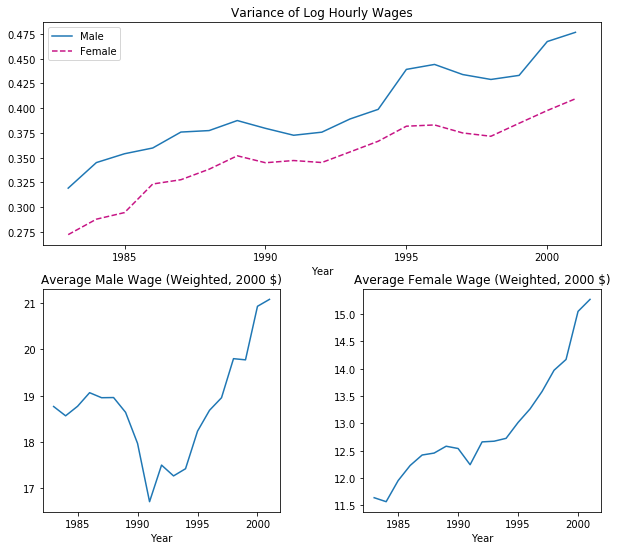

In [5]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[10,10])
years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    if female != digit:
        plt.subplot(2,2,3)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years), 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Wage (Weighted, 2000 $)")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)
plt.subplot(2,2,4)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Average Female Wage (Weighted, 2000 $)")


df["log Wage"] = np.log(df["Wage"])
grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "log Wage"]].to_numpy())
years = []
variances = []
digit = 1
plt.subplot(2,1,1)
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    if female == digit:
        plt.plot(years,variances,label="Male")
        digit = 0
        years=[]
        variances=[]
    years.append(year)
    variances.append(variance)
#sns.set_style("whitegrid")
plt.plot(years,variances,color = "mediumvioletred", linestyle="--",label="Female")
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Variance of Log Hourly Wages")
plt.legend()
plt.subplots_adjust(wspace=0.35, bottom=0.2)

In [2]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Annual hours"]].to_numpy())
plt.figure(figsize=[20,5])
years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    if female != digit:
        plt.subplot(1,2,1)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years), 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Annual Hours")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)

plt.subplot(1,2,2)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
string = "Annual Hours"
plt.suptitle(string,fontsize=15)
plt.title("Average Female Annual Hours")
plt.show()

print("""Because women have consistently increased their annual hours whereas men have stayed stagnent at around 2100 hours,
women have been able to increase their average wage more than men. This is because with longer hours, females started 
to get into higher paying jobs, and with same average hours, men were not increasing their population in highly 
expertised field. However, the female average wage did not surpass male average wage because men continued to have 
longer annual hours, and therefore a greater amount of people in advanced careers. These charts clearly demonstrate 
how longer annual hours are correlated with higher wages and more advanced careers.
""")

NameError: name 'df' is not defined

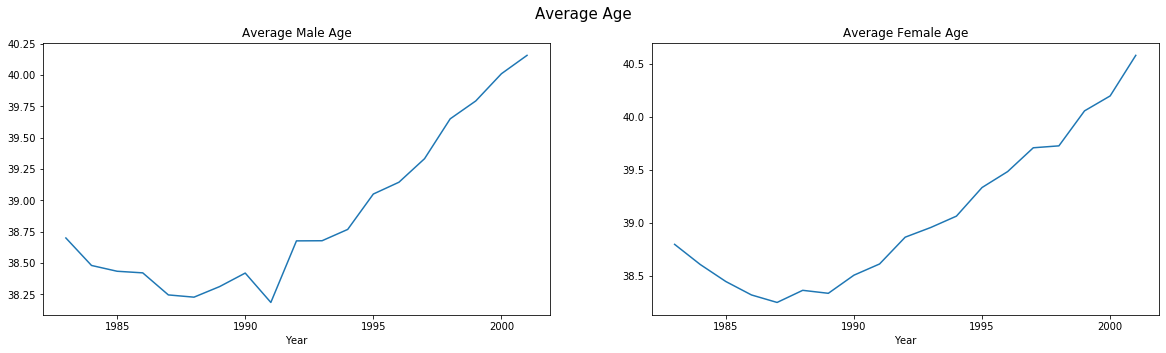


These graphs are very similar in shape where in 1980s, the average age decreases, signaling that a new generation had entered the workforce. However, it is also notable that the average only fluctuates by 3 years throughout the entire graph, showing that the average age will stay pretty much the same as new generations enter the workforce.

One thing we can deduce from this graph is that the reason women increased their salery more than men was not a 
result of a more women entering the work force than in the past. If a greater number of women had entered the worfoce 
in the 1980s than in the past, the average age of women would shoot down as the younger women would outweigh the
older. But looking at the graph, this did not happen. Indeed, the average age of women completely mirrors that of 
men. Since there is not a deep decrease in average age for women, we know that the reason that women started 
getting higher saleries must be a product of women going into more lucrative fields.



In [11]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Age"]].to_numpy())
plt.figure(figsize=[20,5])

years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values,weights=weights)
    if female != digit:
        plt.subplot(1,2,1)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years)+1, 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Age")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)
plt.subplot(1,2,2)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
string = "Average Age"
plt.suptitle(string,fontsize=15)
plt.title("Average Female Age")
plt.show()
print("""
These graphs are very similar in shape where in 1980s, the average age decreases, signaling that a new generation had entered the workforce. However, it is also notable that the average only fluctuates by 3 years throughout the entire graph, showing that the average age will stay pretty much the same as new generations enter the workforce.

One thing we can deduce from this graph is that the reason women increased their salery more than men was not a 
result of a more women entering the work force than in the past. If a greater number of women had entered the worfoce 
in the 1980s than in the past, the average age of women would shoot down as the younger women would outweigh the
older. But looking at the graph, this did not happen. Indeed, the average age of women completely mirrors that of 
men. Since there is not a deep decrease in average age for women, we know that the reason that women started 
getting higher saleries must be a product of women going into more lucrative fields.


""")



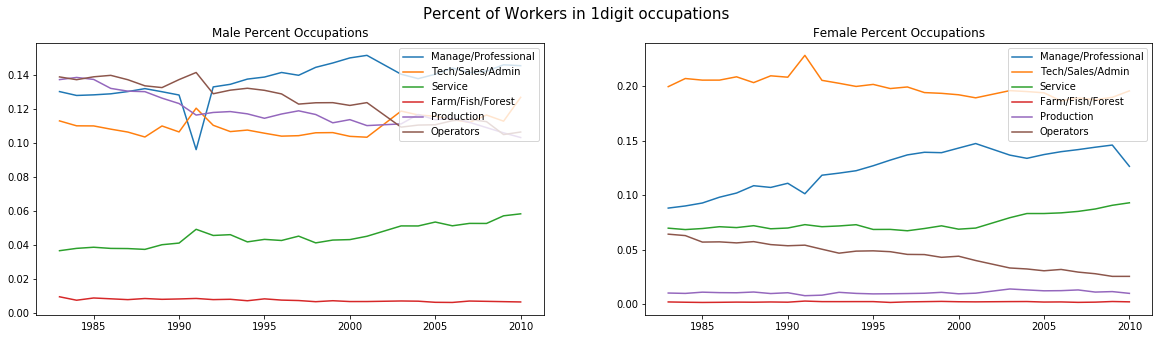


These graphs are a great repersentation of why women's wages would increase more than male wages. In the female 
graph, the percentage of women in lucrative professions such as Manage/Professional and Service increase while the 
lower paying professions such as Operators decrease as a percentage. On the other, male percent occupations stays 
pretty consistent throughout the graph except in the beggining, which demonstrates why men did not have as great an 
increase in wages as women. Additionally, it leads me to believe that the male increase in wages came from better 
pay rather than greater percentage of men going into the money making fields.



In [6]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]
years_grouped = df.groupby('Year')["Asecwt"].sum().reset_index()
years_grouped = years_grouped.rename(columns={"Asecwt":"big"})
grouped = df.groupby(["Female",'1digit occupation',"Year"])["Asecwt"].sum().reset_index()
grouped = grouped.merge(years_grouped, on="Year", how="left")
grouped["percent"] = grouped["Asecwt"] / grouped["big"]
plt.figure(figsize=[20,5])
digit = 1
digit_sex = 0
employments= []
years= []
plt.subplot(1,2,1)
for x in range(len(grouped)):
    female = grouped.iloc[x][0]
    one = grouped.iloc[x][1]
    year = grouped.iloc[x][-1]
    employment_percent = grouped.iloc[x][2]
    if digit != one:
        plt.plot(employments,years, label=cf.loc[digit]["occupation"])
        digit = one
        years = []
        employments = []
    if digit_sex != female:
        plt.title("Male Percent Occupations")
        plt.legend(loc=1)
        plt.subplot(1,2,2)
        digit_sex=female
    years.append(year)
    employments.append(employment_percent)
plt.plot(employments, years,label=cf.loc[digit]["occupation"])
plt.legend(loc=1)
string = "Percent of Workers in 1digit occupations"
plt.suptitle(string,fontsize=15)
plt.title("""Female Percent Occupations""")
plt.show()
print("""
These graphs are a great repersentation of why women's wages would increase more than male wages. In the female 
graph, the percentage of women in lucrative professions such as Manage/Professional and Service increase while the 
lower paying professions such as Operators decrease as a percentage. On the other, male percent occupations stays 
pretty consistent throughout the graph except in the beggining, which demonstrates why men did not have as great an 
increase in wages as women. Additionally, it leads me to believe that the male increase in wages came from better 
pay rather than greater percentage of men going into the money making fields.
""")

In [7]:
df["Year_bins"] = pd.cut(df["Year"],bins=[1975,1980,1985,1990,1995,2000,2010])

In [8]:
grouped = df.groupby(["Year_bins"])['Asecwt'].sum().reset_index()
grouped = grouped.rename({"Asecwt":"summy"}, axis=1)

grouped = pd.merge(df, grouped, on="Year_bins", how="left")
arrays=[]
csv = []
grouped = grouped.groupby(["2digit occupation", "Year_bins"])
for x in df["2digit occupation"].sort_values().unique():
    for y in df["Year_bins"].unique():
        arrays.append(grouped.get_group((x,y))[["2digit occupation", "Year_bins", "Wage", "Asecwt", "summy"]].to_numpy())
for array in arrays:
    two = array[0,0]
    
    year_bins=array[0,1]
    wages = array[:,2]
    weights=array[:,-2]
    total_weights_yearly = array[0,-1]
    average = np.round(np.average(wages,weights=weights),2)
    variance = np.round(np.average((wages-average)**2, weights=weights),2)
    employment = np.sum(weights)
    percent_employment = np.round(employment/total_weights_yearly*100)
    csv.append([two,year_bins,average,variance,employment, percent_employment])
    
hf = pd.DataFrame(csv,columns=["2digit occupation", "Year_bin","Weighted Mean Wage", "Weighted Wage Variance", "Weighted Employment", "Weighted Percent Employment"])


hf.to_csv("../../output/organized_values.csv")

